In [290]:
import sys

import numpy as np
import pytest

sys.path.append('../src')
import connectfour as c4
from connectfour import game

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [272]:
print(str(board.array))

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


In [276]:
s= 'X'.rjust(2)

In [278]:
np.unique([[1,2,0],[3,1,0]])

array([0, 1, 2, 3])

In [269]:
str(game.Player.o.value)

'-1'

In [293]:
array = np.array([[0,1,0,0],[0,-1,0,1],[1,-1,1,-1]])
board = game.ConnectFourBoard.from_array(array)

In [296]:
str(board)

'ConnectFourBoard\n  .  X  .  .\n  .  O  .  X\n  X  O  X  O'

In [317]:

class TestConnectFourBoard:
    def test_default_init(self):
        board = game.ConnectFourBoard()
        assert board.shape == (6,7), "default initialization should lead to shape (6,7)"

    def test_custom_init_shape(self):
        shape = (12,15)
        board = game.ConnectFourBoard(shape)
        assert board.shape == (12,15), "board shape is not updating as expected"
    
    def test_from_array_constructor_happy_path(self):
        array = np.array([[0,1,0,0],[0,-1,0,1],[1,-1,1,-1]])
        board = game.ConnectFourBoard.from_array(array)
        assert board.shape == array.shape, "from_array creates boards with incorrect shape"

    def test_from_array_constructor_invalid_values(self):
        with pytest.raises(AssertionError):
            array = np.array([[0,1,0,0],[0,-1,0,1],[1,-1,1,-2]])
            board = game.ConnectFourBoard.from_array(array)
            
    def test_board_updates(self):
        array = np.array([[0,1,0,0],[0,-1,0,1],[1,-1,1,-1]])
        board = game.ConnectFourBoard.from_array(array)
        board[0,0] = 1
        assert board[0,0] == 1
            
test = TestConnectFourBoard()
test.test_board_updates()

In [318]:
array = np.array([[0,1,0,0],[0,-1,0,1],[1,-1,1,-1]])
board = game.ConnectFourBoard.from_array(array)
board[1,2] = Player.x.value

In [373]:
state

ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  O  X  .  .
  .  .  .  X  X  .  .
  .  .  .  O  O  .  .
  X  .  .  X  X  .  .
  X  .  O  O  O  .  .
  O  O  X  O  X  .  .
	player=Player.x

In [256]:
np.ones((6,7), dtype=int)

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

In [14]:
# reload pre-trained evaluator
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)

build_model
Metal device set to: Apple M1 Pro


2022-03-09 14:29:44.747243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-09 14:29:44.747367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


To see model details, enter:
	>>> <pvn>.summary()


build_model
To see model details, enter:
	>>> <pvn>.summary()


2022-03-11 13:33:34.752788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


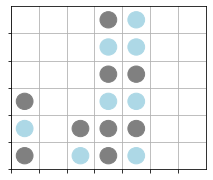

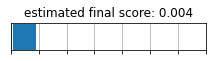

In [387]:
def generate_test_state(played_positions: list[int]) -> c4.game.ConnectFourGameState:
    """allows to generate a state, based on a succession of moves."""
    board = game.ConnectFourBoard()
    state = c4.game.ConnectFourGameState(board, next_player=game.Player.x)
    for position in played_positions:
        action = c4.game.ConnectFourAction(position, state.next_player)
        state = state.move(action)
    return state

state = generate_test_state([3,4,4,4,3,3,3,3,4,4,3,4,0,2,2,0,0])

c4.render.renderConnectFour(state)
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)
policy, value = evaluator.infer_from_state(state)
c4.render.render_policy(policy, title=f"estimated final score: {value:.3f}")

In [394]:
board = game.ConnectFourBoard()
state = c4.game.ConnectFourGameState(board, next_player=game.Player.x)
state.is_game_over()

True

In [405]:
import pandas as pd

In [409]:
# random self-play
def generate_random_game(render: bool = False) -> dict:
    board = game.ConnectFourBoard()
    state = c4.game.ConnectFourGameState(board, next_player=game.Player.x)
    game_length = 0
    
    while not state.is_game_over():
        if render:
            c4.render.renderConnectFour(state)
        actions = state.get_legal_actions()
        action = np.random.choice(actions)
        state = state.move(action)
        game_length +=1
    
    if render:
        c4.render.renderConnectFour(state)
        
    return {'game_length': game_length, 'result': state.game_result}

random_simulation = pd.DataFrame([generate_random_game() for _ in range(1000)])

In [410]:
random_simulation.describe()

,game_length,result
count,1000.000000,1000.000000
mean,21.458000,0.132000
std,7.466591,0.989725
min,7.000000,-1.000000
25%,16.000000,-1.000000
50%,21.000000,1.000000
75%,27.000000,1.000000
max,42.000000,1.000000


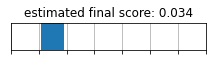

In [365]:
state.board.array = -state.board.array
policy, value = evaluator.infer_from_state(state)
c4.render.render_policy(policy, title=f"estimated final score: {value:.3f}")

In [366]:
p = c4.game.Player.x

In [372]:
Player['x']

<Player.x: -1>

In [342]:
played_positions = [3,4,4,4]
board = game.ConnectFourBoard()
state = c4.game.ConnectFourGameState(board, player=Player.x)
for position in played_positions:
    action = c4.game.ConnectFourAction(position, state.player)
    state = state.move(action)

NameError: name 'next_player' is not defined

In [341]:
set(np.unique(np.copy(board.array)))

{0}

In [330]:
board.copy()

AssertionError: array values must be either {0, 1, -1}

In [326]:
action

x:3 p:-1

In [240]:
from enum import Enum

class Player(Enum):
    x = -1
    o = 1
    
    def get_next(self):
        if self == Player.x:
            return Player.o
        else:
            return Player.x

player = Player.o
player.get_next()

<Player.x: -1>

In [127]:
import yaml

class DictToObject:
    def __init__(self, d: dict):
        self._d = d
        for k, v in d.items():
            if type(v) == dict:
                new_val = DictToObject(v)
            elif type(v) == list:
                new_val = [DictToObject(element) for element in d]
            else:
                new_val = v

            setattr(self, k, new_val)
            
    def __repr__(self) -> str:
        attributes = [f"{k}={v}" for k,v in self.to_dict().items()]
        
        return f"DictToObject({', '.join(attributes)})"
    
    def to_dict(self):
        return self._d

with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
config = DictToObject(config)

config.to_dict()
config
            
    
        

DictToObject(name=test, board={'width': 7, 'height': 6}, pvn={'block_size': 1, 'l2_const': '1e-4'}, training_config={}, mcts={'C_PUCT': 4, 'sims': 100, 'tau': 1}, selfplay={'tau_start': 1, 'tau_end': 0.1, 'threshold': 10})

In [110]:
attributes = [f"{k}={v}" for k,v in config.__dict__.items()]
",".join(attributes)

"name=test,board_config=DictToObject({'width': 7, 'height': 6}),pvn_config=DictToObject({'block_size': 1, 'l2_const': '1e-4'}),training_config=DictToObject({}),mcts_config=DictToObject({'C_PUCT': 4, 'sims': 100, 'tau': 1}),selfplay_config=DictToObject({'tau_start': 1, 'tau_end': 0.1, 'threshold': 10})"

In [84]:
config = Config()

In [86]:
config.board_config

{'width': 7, 'height': 6}

In [72]:
m.board_config.height

6

In [229]:
state.game_result

-1

IndexError: index 0 is out of bounds for axis 0 with size 0

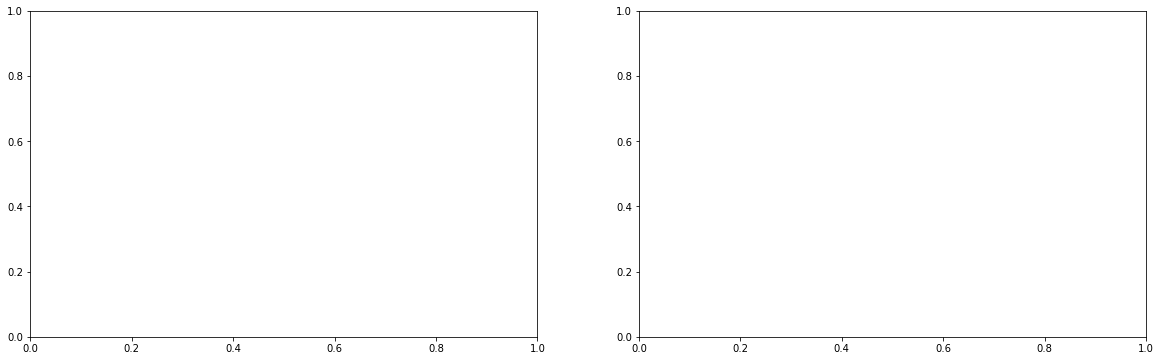

In [204]:
c4.viz.compare_players(logpath='../logs')

In [194]:
state.board

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0, -1,  1,  0,  0]])

In [ ]:
class ConnectFourBoard:
    def __init__(self, x_size, y_size):
        self.board = np.zeros(x_size, y_size)
        
    def update_board(self, column, )

In [16]:
state = np.zeros((6,7))
state = c4.game.ConnectFourGameState(state)
evaluator.infer_from_state(state)

2022-03-09 14:30:55.289730: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-09 14:30:55.337157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(array([0.02277379, 0.12248434, 0.14792278, 0.42892304, 0.15953705,
        0.10054208, 0.01781694], dtype=float32),
 0.11540254950523376)

In [24]:
state.get_legal_actions()

[x:0 v:1, x:1 v:1, x:2 v:1, x:3 v:1, x:4 v:1, x:5 v:1, x:6 v:1]

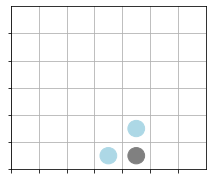

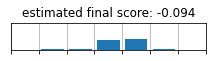

In [168]:
state = c4.game.ConnectFourGameState(np.zeros((6,7)), next_to_move=-1)
actions = [(3,-1),(4,1), (4,-1)]
for action in actions:
    state = state.move(c4.game.ConnectFourAction(*action))
c4.render.renderConnectFour(state)
policy, value = evaluator.infer_from_state(state)
c4.render.render_policy(policy, title=f"estimated final score: {value:.3f}")

In [ ]:
import yaml



In [41]:
player = c4.player.AzPlayer(evaluator)
player

AzPlayer(evaluator=PolicyValueNet(name=gen9))

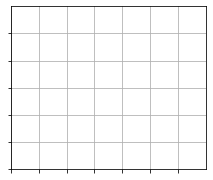

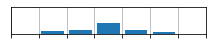

In [22]:
state = np.zeros((6,7))
state.move
c4.render.renderConnectFour(state)
c4.render.render_policy(evaluator.infer_from_state(state)[0], title="")

In [3]:

c4.game.ConnectFourGameState()

x:1 v:1